In [35]:
# @title
from IPython.display import HTML

HTML("""
<div style="text-align:center;">
  <img src="https://img.freepik.com/premium-vector/home-loan-approved-illustration-concept-white-background_701961-836.jpg\" width=\"65%\">
</div>
""")

## ***Home Loan Approval Dataset Overview 🏠💰***
**Dataset Source:** [Home Loan Approval Dataset on Kaggle](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval)

# 📊 Loan Dataset Columns Explained

| Column Name           | Emoji | Description |
|-----------------------|-------|-------------|
| Loan_ID               | 🆔    | Unique ID for each loan application. |
| Gender                | 👤    | Applicant gender: `Male` / `Female`. |
| Married               | 💍    | Marital status: `Yes` / `No`. |
| Dependents            | 👶    | Number of dependents: `0`, `1`, `2`, `3+`. |
| Education             | 🎓    | Education level: `Graduate` / `Not Graduate`. |
| Self_Employed         | 💼    | Self-employed? `Yes` / `No`. |
| ApplicantIncome       | 💰    | Monthly income of the applicant. |
| CoapplicantIncome     | 👥💰  | Monthly income of co-applicant. |
| LoanAmount            | 💵    | Loan amount requested (in thousands). |
| Loan_Amount_Term      | 📅    | Loan term in months (e.g., 360 = 30 years). |
| Credit_History        | 🏦    | Credit history: `1.0` good, `0.0` bad, `NaN` missing. |
| Property_Area         | 🏠    | Property area: `Urban`, `Semiurban`, `Rural`. |
| Loan_Status           | ✅❌   | Loan approval: `Y` / `N` (target column). |

###1️⃣ Load Libraries & Dataset 📂

In [36]:
# 1️⃣ Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2️⃣ Load the Datasets
train_df = pd.read_csv('/content/loan_sanction_train(1).csv')
test_df = pd.read_csv('/content/loan_sanction_test(1).csv')

# Preview the dataset
print("✅ Train Data Loaded:", train_df.shape)
print("✅ Test Data Loaded:", test_df.shape)

✅ Train Data Loaded: (614, 13)
✅ Test Data Loaded: (367, 12)


###2️⃣ Explore the Data 🔍

In [37]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
# Drop ID column
train_df.drop('Loan_ID', axis=1, inplace=True)
test_df.drop('Loan_ID', axis=1, inplace=True)

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [40]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [41]:
train_df.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


##4️⃣ Handle Missing Values 🧹

In [42]:
round(train_df.isnull().sum()/train_df.shape[0]*100,2)

,0
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28
Credit_History,8.14


In [43]:
# Handle Missing Values
from sklearn.impute import KNNImputer

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create ONE imputer for both datasets
imputer = KNNImputer(n_neighbors=5)

# Numerical Imputation - fit on train, transform both
train_df[num_cols] = imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])  # ✅ Only transform

# Categorical Imputation - use train statistics for both
cat_cols_mode = ['Gender', 'Married', 'Dependents']
cat_cols_missing = ['Self_Employed']

for col in cat_cols_mode:
    train_mode = train_df[col].mode()[0]  # ✅ Calculate from train only
    train_df[col].fillna(train_mode, inplace=True)
    test_df[col].fillna(train_mode, inplace=True)  # ✅ Use train mode for test

for col in cat_cols_missing:
    train_df[col].fillna('Missing', inplace=True)
    test_df[col].fillna('Missing', inplace=True)

In [44]:
round(train_df.isnull().sum()/train_df.shape[0]*100,2)

,0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,0.0


In [45]:
train_df.duplicated().sum()

np.int64(0)

##EDA

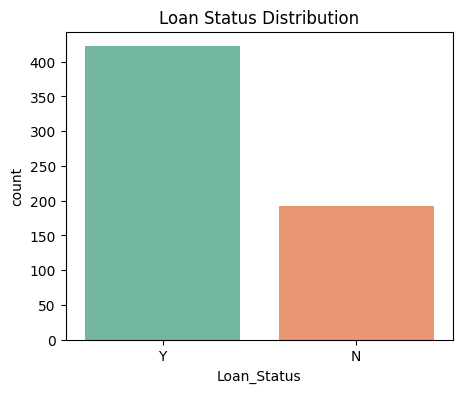


Loan Status Value Counts:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [46]:
# @title
# ============================================
# Target Variable Analysis
# ============================================
plt.figure(figsize=(5,4))
sns.countplot(data=train_df, x='Loan_Status', palette='Set2')
plt.title('Loan Status Distribution')
plt.show()
print("\nLoan Status Value Counts:\n", train_df['Loan_Status'].value_counts())

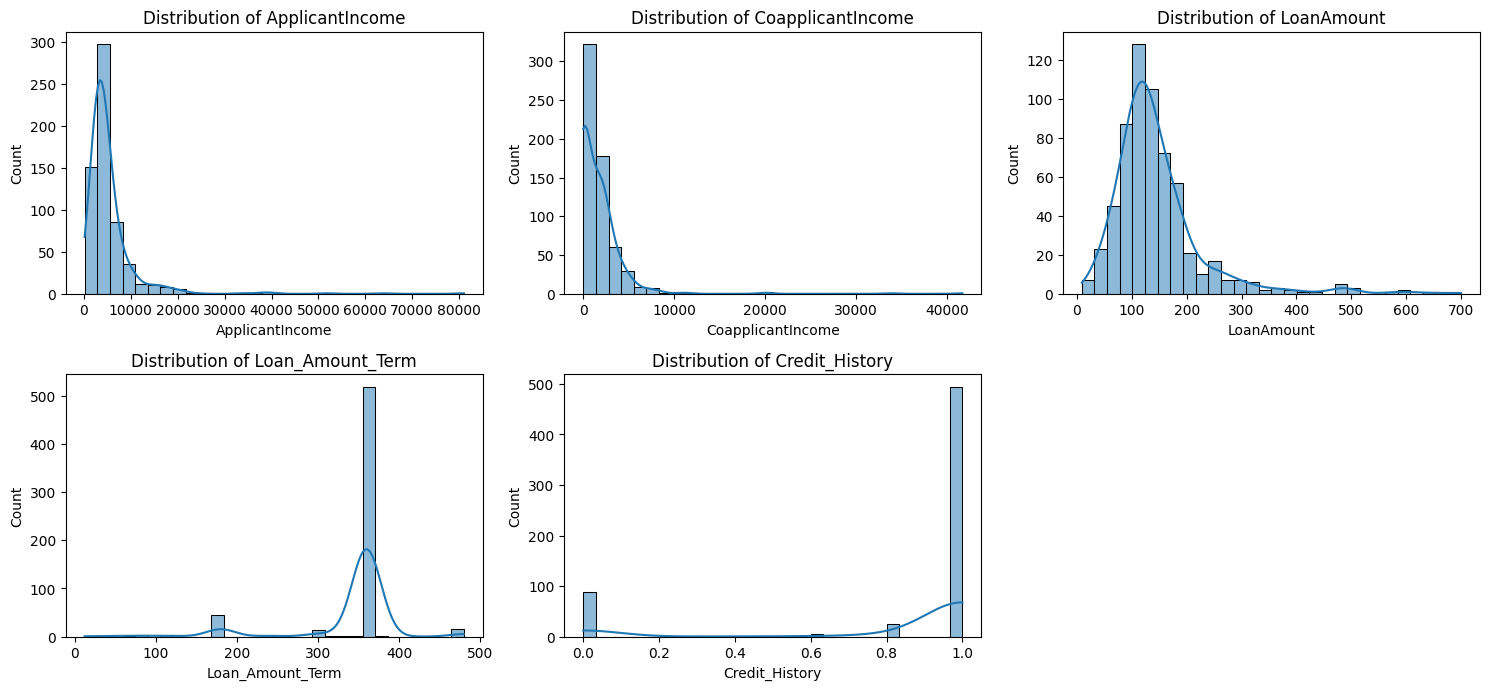

In [47]:
# @title
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## handling outliers

In [48]:
from scipy.stats import mstats

# Log Transform skewed columns
train_df['ApplicantIncome_log'] = np.log1p(train_df['ApplicantIncome'])
train_df['CoapplicantIncome_log'] = np.log1p(train_df['CoapplicantIncome'])
test_df['ApplicantIncome_log'] = np.log1p(test_df['ApplicantIncome'])
test_df['CoapplicantIncome_log'] = np.log1p(test_df['CoapplicantIncome'])

# Winsorize moderate outliers
train_df['LoanAmount'] = mstats.winsorize(train_df['LoanAmount'], limits=[0.01, 0.01])
train_df['Loan_Amount_Term'] = mstats.winsorize(train_df['Loan_Amount_Term'], limits=[0.01, 0.01])
test_df['LoanAmount'] = mstats.winsorize(test_df['LoanAmount'], limits=[0.01, 0.01])
test_df['Loan_Amount_Term'] = mstats.winsorize(test_df['Loan_Amount_Term'], limits=[0.01, 0.01])

##8️⃣ Feature Engineering 🛠️

In [49]:
# Total Income & Debt Ratio
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

train_df['Debt_Income_Ratio'] = train_df['LoanAmount'] / train_df['TotalIncome']
test_df['Debt_Income_Ratio'] = test_df['LoanAmount'] / test_df['TotalIncome']

# Handle Dependents + Family Size
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3).astype(int)
test_df['Dependents'] = test_df['Dependents'].replace('3+', 3).astype(int)
train_df['Family_Size'] = train_df['Dependents'] + 1
test_df['Family_Size'] = test_df['Dependents'] + 1

# One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['Property_Area'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Property_Area'], drop_first=True)

# Label Encoding
train_df['Gender'] = train_df['Gender'].map({'Male':1, 'Female':0})
train_df['Married'] = train_df['Married'].map({'Yes':1, 'No':0})
train_df['Education'] = train_df['Education'].map({'Graduate':1, 'Not Graduate':0})
train_df['Self_Employed'] = train_df['Self_Employed'].map({'Yes':1, 'No':0, 'Missing':0})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y':1, 'N':0})

test_df['Gender'] = test_df['Gender'].map({'Male':1, 'Female':0})
test_df['Married'] = test_df['Married'].map({'Yes':1, 'No':0})
test_df['Education'] = test_df['Education'].map({'Graduate':1, 'Not Graduate':0})
test_df['Self_Employed'] = test_df['Self_Employed'].map({'Yes':1, 'No':0, 'Missing':0})

print("✅ Feature Engineering Complete!")

✅ Feature Engineering Complete!


##9️⃣ Scaling + Split Data ⚖️

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split features and target
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric columns
scaler = StandardScaler()
num_cols_scale = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount', 'Loan_Amount_Term',
                  'Credit_History', 'TotalIncome', 'Debt_Income_Ratio', 'Family_Size']

# Fit scaler on training data only to prevent data leakage
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_scale] = scaler.fit_transform(X_train[num_cols_scale])
X_test_scaled[num_cols_scale] = scaler.transform(X_test[num_cols_scale])

# Handle class imbalance with SMOTE on training data only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training set: {X_train_scaled.shape}")
print(f"Resampled training set: {X_resampled.shape}")

Original training set: (491, 17)
Resampled training set: (674, 17)


#Logistic Regression

In [51]:
# @title
# ============================================
# 🧠 Step 2: Train & Tune Logistic Regression
# ============================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import joblib

log_reg = LogisticRegression(max_iter=2000, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 10, 20),
    'solver': ['liblinear', 'saga']
}

search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,  # Reduced from 7 to 5 for computational efficiency
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

search.fit(X_resampled, y_resampled)
best_model = search.best_estimator_

print("🎯 Best Parameters Found:\n", search.best_params_)

# ============================================
# 📊 Step 3: Evaluate Model
# ============================================
y_pred_best = best_model.predict(X_test_scaled)

print(f"\n📈 Improved Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred_best))

# ============================================
# 💾 Step 4: Save Model
# ============================================
joblib.dump(best_model, "improved_logistic_model.pkl")
print("\n💾 Model saved as 'improved_logistic_model.pkl'")

🎯 Best Parameters Found:
 {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(8.948421052631579)}

📈 Improved Accuracy: 0.8618

📊 Confusion Matrix:
 [[24 14]
 [ 3 82]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74        38
           1       0.85      0.96      0.91        85

    accuracy                           0.86       123
   macro avg       0.87      0.80      0.82       123
weighted avg       0.86      0.86      0.85       123


💾 Model saved as 'improved_logistic_model.pkl'


In [52]:
# @title
import joblib
joblib.dump(best_model, 'improved_logistic_model.pkl')
print("💾 Model saved as 'improved_logistic_model.pkl'")

💾 Model saved as 'improved_logistic_model.pkl'


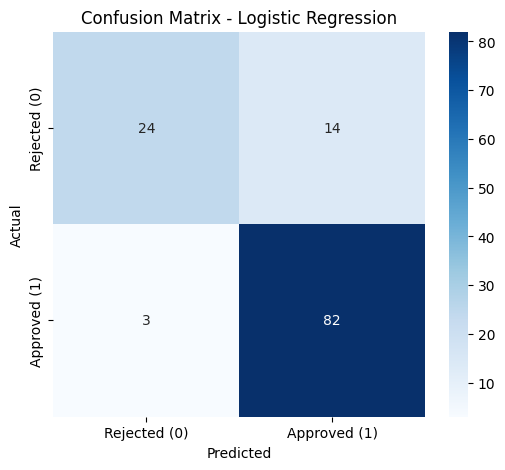

In [53]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
labels = ['Rejected (0)', 'Approved (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

##K-Nearest Neighbors

In [54]:
# @title
# 🔹 Improved KNN Model with Scaling and Balanced Scoring

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# 1️⃣ Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2️⃣ Scale features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ Define KNN and hyperparameter grid
param_grid = {
    'n_neighbors': list(range(3, 21)),  # Try more neighbors
    'weights': ['uniform', 'distance'], # Distance weighting
    'p': [1, 2]                         # Manhattan or Euclidean
}

knn = KNeighborsClassifier()
grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='f1_macro',  # Focus on balanced performance across classes
    n_jobs=-1
)
grid.fit(X_resampled_scaled, y_resampled)

# 4️⃣ Best KNN model
best_knn = grid.best_estimator_
print("🎯 Best Parameters:", grid.best_params_)

# 5️⃣ Predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# 6️⃣ Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"📈 Accuracy: {acc_knn:.4f}")

# 7️⃣ Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\n📊 Confusion Matrix:\n", cm_knn)

# 8️⃣ Classification Report
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred_knn))


🎯 Best Parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
📈 Accuracy: 0.7967

📊 Confusion Matrix:
 [[25 13]
 [12 73]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67        38
           1       0.85      0.86      0.85        85

    accuracy                           0.80       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.80      0.80      0.80       123



In [55]:
import joblib
joblib.dump(best_knn, 'improved_knn_model.pkl')
print("💾 Model saved as 'improved_knn_model.pkl'")

💾 Model saved as 'improved_knn_model.pkl'


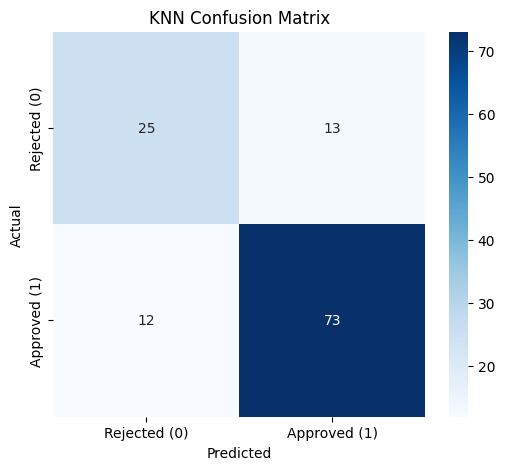

In [56]:
# @title
# Optional: visualize
labels = ['Rejected (0)', 'Approved (1)']
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

##Support Vector Classifier

In [58]:
# @title
# ==========================
# 4️⃣ SVC Model
# ==========================
from sklearn.svm import SVC
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc = SVC(class_weight='balanced')  # Balanced to handle class imbalance
svc_grid = GridSearchCV(
    svc,
    svc_param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
svc_grid.fit(X_resampled_scaled, y_resampled)

best_svc = svc_grid.best_estimator_
print("\n🎯 Best SVC Parameters:", svc_grid.best_params_)

y_pred_svc = best_svc.predict(X_test_scaled)
print(f"📈 SVC Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print("\n📊 SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\n🧾 SVC Classification Report:\n", classification_report(y_test, y_pred_svc))


🎯 Best SVC Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
📈 SVC Accuracy: 0.8130

📊 SVC Confusion Matrix:
 [[26 12]
 [11 74]]

🧾 SVC Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        38
           1       0.86      0.87      0.87        85

    accuracy                           0.81       123
   macro avg       0.78      0.78      0.78       123
weighted avg       0.81      0.81      0.81       123



In [59]:
# @title
import joblib
joblib.dump(best_svc, 'improved_svc_model.pkl')
print("💾 Model saved as 'improved_svc_model.pkl'")

💾 Model saved as 'improved_svc_model.pkl'


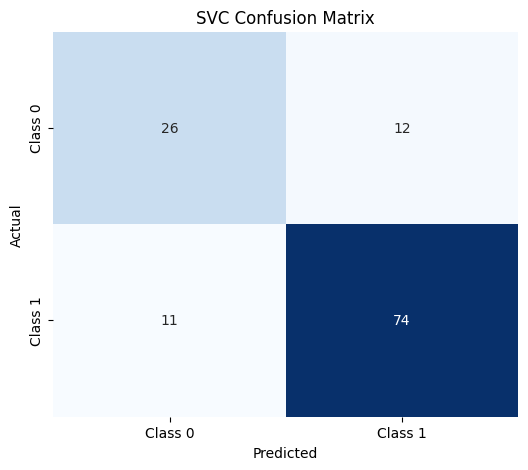

In [60]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 🔹 Compute confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# 🔹 Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()


📊 Model Performance Summary (Sorted by Accuracy):



,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Logistic Regression,0.861789,0.888889,0.631579,0.738462,0.854167,0.964706,0.906077
1,SVC,0.813008,0.702703,0.684211,0.693333,0.860465,0.870588,0.865497
2,KNN,0.796748,0.675676,0.657895,0.666667,0.848837,0.858824,0.853801


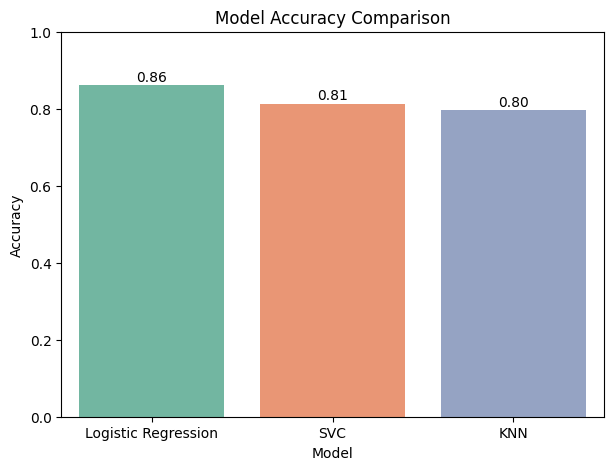

<Figure size 640x480 with 0 Axes>

In [61]:
# @title
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Models and predictions
models = {
    "Logistic Regression": y_pred_best,
    "KNN": y_pred_knn,
    "SVC": y_pred_svc
}

# 🔹 Create a summary table
summary = []

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)
    summary.append({
        "Model": name,
        "Accuracy": acc,
        "Precision_0": report['0']['precision'],
        "Recall_0": report['0']['recall'],
        "F1_0": report['0']['f1-score'],
        "Precision_1": report['1']['precision'],
        "Recall_1": report['1']['recall'],
        "F1_1": report['1']['f1-score']
    })

summary_df = pd.DataFrame(summary)

# 🔹 Sort by Accuracy (descending)
summary_df = summary_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("📊 Model Performance Summary (Sorted by Accuracy):\n")
display(summary_df)

# 🔹 Plot Accuracy Bar Chart
plt.figure(figsize=(7,5))
sns.barplot(x="Model", y="Accuracy", data=summary_df, palette="Set2")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(summary_df["Accuracy"]):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center')
plt.show()

plt.tight_layout()
plt.show()


###✅ Conclusion

####The best model is Logistic Regression